In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360) #Connect to Google

In [4]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Yoga', 'Meditation',  'Mindfulness','Sleep', 'Insomnia']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y', #For months only available 1,2,3 months 'today 3-m'
     geo='',
     gprop='')
data = pytrend.interest_over_time()
data = data.drop(labels=['isPartial'],axis='columns')
data=data.reset_index()
data=data[data['date']>'2019-12-31']
data=data.set_index('date')

<IPython.core.display.Javascript object>


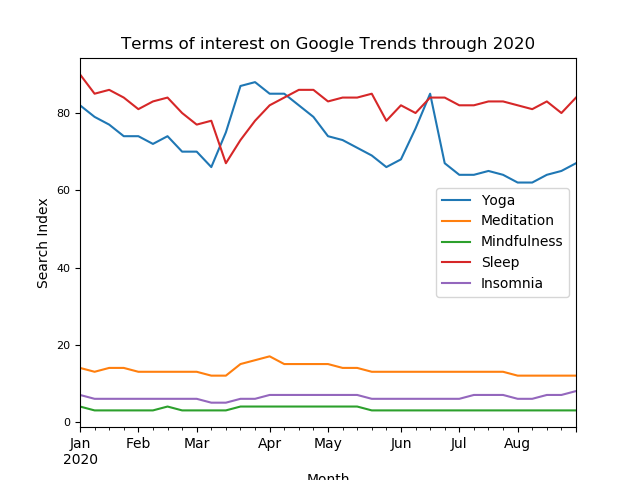

In [5]:
data.plot(title = 'Terms of interest on Google Trends through 2020'); #; To remove the message
plt.xlabel('Month')
plt.ylabel('Search Index')
plt.yticks(size=8)
plt.show()

# Yoga search components

In [6]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['Yoga']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y', #For months only available 1,2,3 months 'today 3-m'
     geo='',
     gprop='images')
data_images = pytrend.interest_over_time()

In [7]:
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y', #For months only available 1,2,3 months 'today 3-m'
     geo='',
     gprop='youtube')
data_youtube = pytrend.interest_over_time()

In [8]:
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 5-y', #For months only available 1,2,3 months 'today 3-m'
     geo='',
     gprop='')
data_web = pytrend.interest_over_time()

In [9]:
df1=data_web.merge(data_youtube, left_index=True, right_index=True)
df2=df1.merge(data_images, left_index=True, right_index=True)
df2=df2.rename(columns={'Yoga_x': 'Web', 'Yoga_y': 'YouTube', 'Yoga':'Images'})

In [10]:
df = df2[df2.columns.drop(list(df2.filter(regex='Partial')))]

<IPython.core.display.Javascript object>


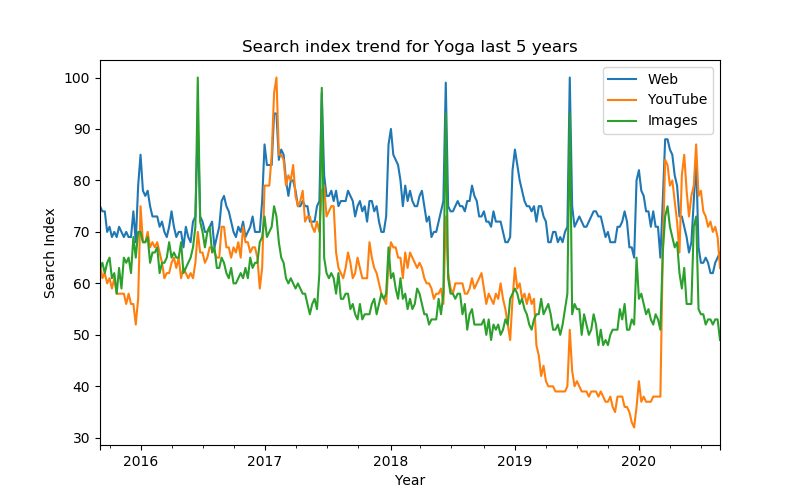

In [12]:
df.plot(figsize=(8,5))
plt.xlabel('Year')
plt.ylabel('Search Index')
plt.title('Search index trend for Yoga last 5 years')
plt.show()

In [13]:
df=df.reset_index()
df=df.rename(columns={'date': 'Week'})

In [14]:
df['Month'] = pd.DatetimeIndex(df['Week']).month
df['Year'] = pd.DatetimeIndex(df['Week']).year
df=df[df['Year']>2016]

In [15]:
df=df[['Year','Month','YouTube', 'Web', 'Images']].groupby(['Year', 'Month']).agg('mean')

<IPython.core.display.Javascript object>


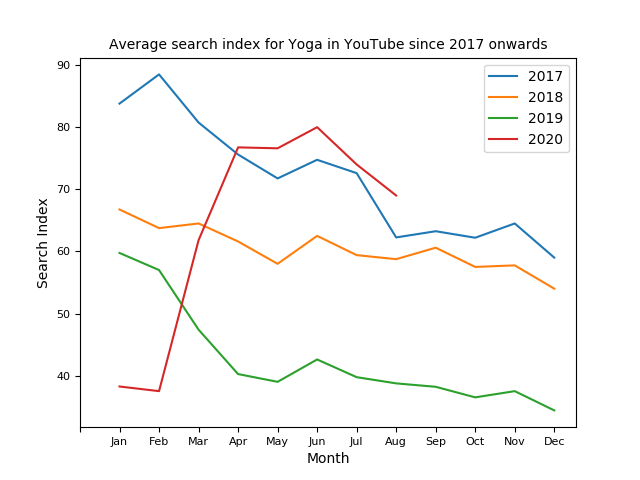

In [42]:
df.reset_index().pivot('Month', 'Year','YouTube').plot()
plt.ylabel('Search Index')
plt.legend(loc=0) 
plt.title('Average search index for Yoga in YouTube since 2017 onwards',size=10) 
plt.xticks(np.arange(0,13,1), ['','Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], size=8)
plt.yticks(size=8)
plt.show()

<IPython.core.display.Javascript object>


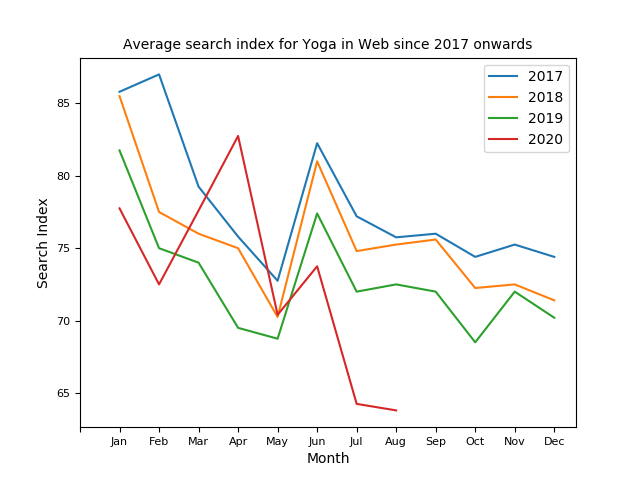

In [41]:
df.reset_index().pivot('Month', 'Year','Web').plot()
plt.ylabel('Search Index')
plt.legend(loc=0) 
plt.title('Average search index for Yoga in Web since 2017 onwards',size=10) 
plt.xticks(np.arange(0,13,1), ['','Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], size=8)
plt.yticks(size=8)
plt.show()

<IPython.core.display.Javascript object>


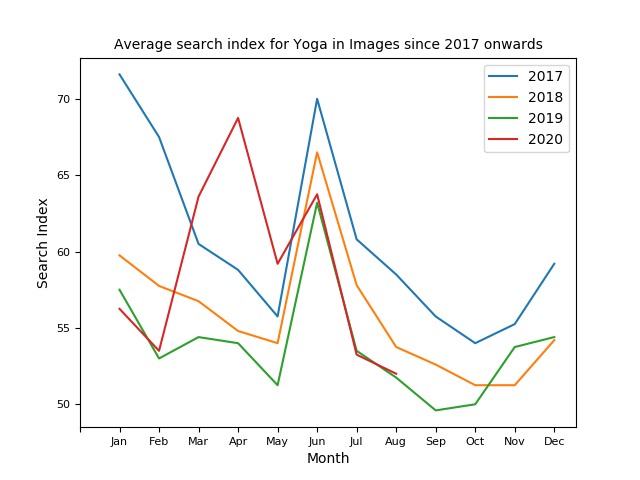

In [40]:
df.reset_index().pivot('Month', 'Year','Images').plot()
plt.ylabel('Search Index')
plt.legend(loc=0) 
plt.title('Average search index for Yoga in Images since 2017 onwards',size=10) 
plt.xticks(np.arange(0,13,1), ['','Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], size=8)
plt.yticks(size=8)
plt.show()